# Visualize Hmm Results
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
Get a visualized overview of the hidden markov modeling results. <br>
This notebook has to be reloaded before analysing a new group of data!

## Load merged .h5 files

A merged .h5 file is the result of the MergeHdf5 Jupyter Notebook. It comprises the hmm results as well as the type analysis results. All .5 files of the chosen directory will be loaded. A graphviz installation is needed https://www.graphviz.org/download/. The path to the bin folder of the graphviz installation has to be copied in the graphviz bin path box (example: C:/Program Files (x86)/Graphviz2.38/bin) & a temporary folder (example: C:/Users/pcoffice37/Documents/graphviz_tmp) has to be created on the computer to allow state transition diagram plotting.

In [1]:
from pySPT.widgets.widgetNotebooks import load_merged_h5
from pySPT.widgets.widgetNotebooks import init_save_hmm_vis_stats
from pySPT.widgets import widgetHmmVis
from pySPT.hmm import hmmVisualization
import warnings
import time
warnings.filterwarnings('ignore')
widget_hmm_vis = widgetHmmVis.WidgetHmmVis()
hmm_vis = hmmVisualization.HmmVisualization()
display(widget_hmm_vis.add_graphviz_bin_box, widget_hmm_vis.add_graphviz_tmp_box, widget_hmm_vis.load_dir_box, widget_hmm_vis.load_dir_button)
widget_hmm_vis.load_dir_button.on_click(widget_hmm_vis.open_dir)
widget_hmm_vis.load_dir_box.observe(widget_hmm_vis.change_load_dir_box)

Text(value='C:\\Program Files (x86)\\Graphviz2.38\\bin', description='Graphviz bin path', placeholder='Type so…

Text(value='C:\\Users\\pcoffice37\\Documents\\graphviz_tmp', description='Graphviz tmp path', placeholder='Typ…

Text(value='directory', description='Directory', placeholder='Type something', style=DescriptionStyle(descript…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

## Plot results

Choose if the state population is based on the physical model, the equilibrium matrix or the occurence of states.

In [2]:
display(widget_hmm_vis.state_radiobutton)

RadioButtons(options=('physical model', 'equilibrium matrix', 'state occurence'), value='physical model')

Button(description='plot', style=ButtonStyle(), tooltip='click to plot')

Mean population of states: 0.79179 0.20821  
Mean transition probabilities:
0.94618 0.05382
0.18777 0.81223
Mean diffusion coefficients [µm²/s]: 0.00000 0.60738  


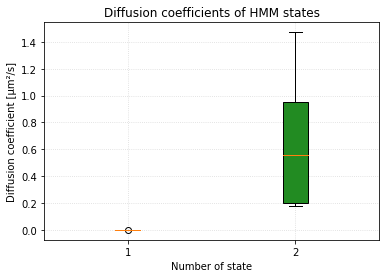

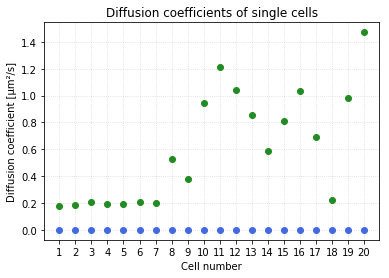

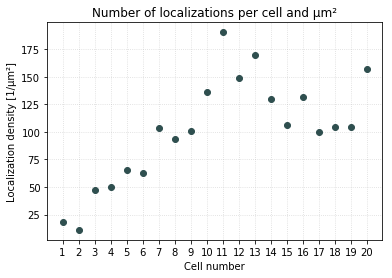

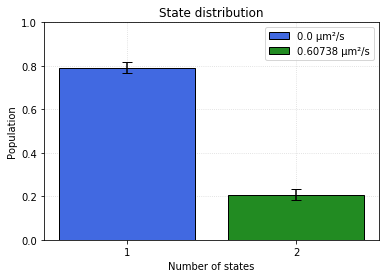

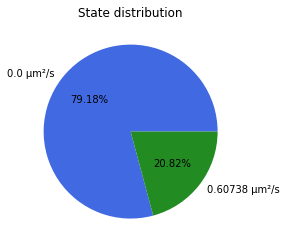

In [3]:
def event(blub):
    hmm_vis.state = widget_hmm_vis.state_radiobutton.value
    widget_hmm_vis.search_sub_folders(widget_hmm_vis.load_dir_box.value)
    hmm_vis.bin_path = widget_hmm_vis.add_graphviz_bin_box.value
    hmm_vis.tmp_path = widget_hmm_vis.add_graphviz_tmp_box.value
    hmm_vis.cells = load_merged_h5(widget_hmm_vis.file_names)
    hmm_vis.run()
display(widget_hmm_vis.plot_button)
widget_hmm_vis.plot_button.on_click(event)

## Plot trajectories

In [4]:
def dropdown(event):
    widget_hmm_vis.cell_options = widget_hmm_vis.get_cell_names(hmm_vis.cells)
widget_hmm_vis.plot_button.on_click(dropdown)
display(widget_hmm_vis.drop_down_cells)

Dropdown(description='Number:', options=(), value=None)

In [5]:
def dropdown(event):      
    for cell in hmm_vis.cells:
        if cell.hmm_cell_name == widget_hmm_vis.drop_down_cells.value:
            trajectory_indexes = sorted(list(set(map(lambda x: x[0], cell.trc_hmm))))
            widget_hmm_vis.trajectory_options = trajectory_indexes
            widget_hmm_vis.drop_down_trajectories.options = widget_hmm_vis.trajectory_options
widget_hmm_vis.drop_down_cells.observe(dropdown)
display(widget_hmm_vis.drop_down_trajectories)

Dropdown(description='Number:', options=(), value=None)

In [6]:
def plot_particle(event):
    widget_hmm_vis.create_clear_output()
    display(widget_hmm_vis.plot_trajectory_button)
    hmm_vis.plot_trajectory(widget_hmm_vis.drop_down_cells.value, widget_hmm_vis.drop_down_trajectories.value)
display(widget_hmm_vis.plot_trajectory_button)
widget_hmm_vis.plot_trajectory_button.on_click(plot_particle)

Button(description='plot', style=ButtonStyle(), tooltip='plot chosen trajectory')

## Save results

Choose a directory and a folder name. A .h5 file with the statistics and the informations of all plots will be saved. If the "save plots" box is checked, all plots will be saved as .pdf.

In [7]:
def saving(event):
    if not widget_hmm_vis.save_dir_name:
        print("Please insert a directory")
    else:
        widget_hmm_vis.create_clear_output()
        hmm_vis.save_dir, hmm_vis.save_folder_name, hmm_vis.save_plots = widget_hmm_vis.save_dir_name, widget_hmm_vis.save_folder_name_box.value, widget_hmm_vis.save_plots_checkbox.value
        if hmm_vis.save_plots:
            hmm_vis.run_save_plots()
        init_save_hmm_vis_stats(hmm_vis, hmm_vis.save_dir, hmm_vis.save_folder_name)
display(widget_hmm_vis.save_dir_box, widget_hmm_vis.save_dir_button, widget_hmm_vis.save_folder_name_box, widget_hmm_vis.save_plots_checkbox, widget_hmm_vis.save_button)
widget_hmm_vis.save_dir_button.on_click(widget_hmm_vis.save_open_dir)
widget_hmm_vis.save_button.on_click(saving)

Text(value='', description='Insert directory', placeholder='Type something', style=DescriptionStyle(descriptio…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

Text(value='190830_hmm_results', description='Folder name', placeholder='name of folder', style=DescriptionSty…

Checkbox(value=True, description='Save plots')

Button(description='save', style=ButtonStyle(), tooltip='click to save')